In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

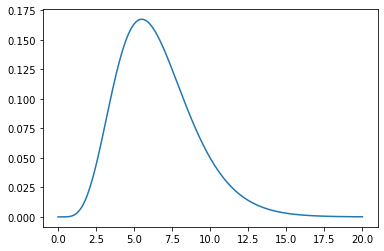

In [10]:
# Specify and plot serial interval distribution.
serial_dist = stats.gamma(6.5)

domain = np.linspace(0,20,1000)
image = serial_dist.pdf(domain)
plt.plot(domain, image)

In [49]:
# Set R0.
R0 = 1.3

In [50]:
# Discretize the serial distribution.
def serial_discrete(s):
    if s <= 1:
        result = serial_dist.cdf(1.5)
        return result
    else:
        add = serial_dist.cdf(s+0.5)
        less = serial_dist.cdf(s-0.5)
        result = add-less
        return result
        

In [51]:
ndays = 100
infections = np.zeros(ndays)
infections[0] = 2

In [52]:
for i in range(1,ndays):
    summation = 0
    for j in range(i):
        summation += infections[j]*serial_discrete(i-j)
    infections[i] = R0*summation

array([2.00000000e+00, 5.37077484e-03, 5.91415011e-02, 1.90225684e-01,
       3.38710097e-01, 4.34578557e-01, 4.64124626e-01, 4.57004347e-01,
       4.47639186e-01, 4.53152198e-01, 4.73201871e-01, 4.99879089e-01,
       5.26411450e-01, 5.50383386e-01, 5.72698698e-01, 5.95243439e-01,
       6.19295260e-01, 6.45163489e-01, 6.72578339e-01, 7.01192037e-01,
       7.30846154e-01, 7.61584139e-01, 7.93543878e-01, 8.26857900e-01,
       8.61613466e-01, 8.97861836e-01, 9.35644142e-01, 9.75010053e-01,
       1.01602274e+00, 1.05875505e+00, 1.10328395e+00, 1.14968752e+00,
       1.19804473e+00, 1.24843678e+00, 1.30094832e+00, 1.35566812e+00,
       1.41268915e+00, 1.47210843e+00, 1.53402701e+00, 1.59855007e+00,
       1.66578711e+00, 1.73585224e+00, 1.80886438e+00, 1.88494748e+00,
       1.96423072e+00, 2.04684871e+00, 2.13294172e+00, 2.22265591e+00,
       2.31614360e+00, 2.41356349e+00, 2.51508099e+00, 2.62086844e+00,
       2.73110544e+00, 2.84597914e+00, 2.96568458e+00, 3.09042498e+00,
      

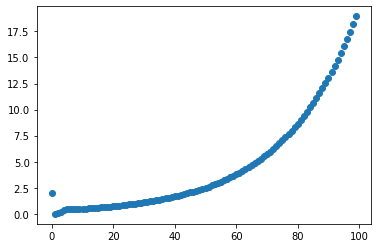

In [53]:
days = [i for i in range(ndays)]
plt.scatter(days, infections)
infections